In [1]:
from google.colab import drive
drive.mount('/content/drive')
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

Mounted at /content/drive


In [8]:
import nltk
nltk.download('stopwords')
import re
from bs4 import BeautifulSoup
import numpy as np
import torch

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
path = "/content/drive/MyDrive/MWP(Words and Values in List).csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Problem,Level,Type,Solution,Extracted words(List),Extracted Num(List)
0,0,There are constants alpha and beta suc...,Level 5,Algebra,The numerator x^2 - 80x + 1551 factors as (...,"['There', 'are', 'constants', 'alpha', 'and', ...","['2', '80', '1551', '2', '57', '2970']"
1,1,The length of the segment between the points ...,Level 5,Algebra,"By the distance formula, the distance from (2...","['The', 'length', 'of', 'the', 'segment', 'bet...","['2', '4', '4', '1', '2', '10']"
2,2,Chewbacca has 20 pieces of cherry gum and 30 p...,Level 5,Algebra,"If Chewbacca loses one pack of cherry gum, the...","['Chewbacca', 'has', 'pieces', 'of', 'cherry',...","['20', '30', '5']"
3,3,"For some constants a and b, let [f(x) = ...",Level 5,Algebra,"Setting x = 3, we get f(3) = -1. Since -1...","['For', 'some', 'constants', 'a', 'and', 'b', ...","['2', '8', '3', '2']"
4,4,Calculate the sum 1 + 3 + 5 + cdots + 15 + ...,Level 2,Algebra,"The arithmetic sequence 1, 3, 5, dots , 17,...","['Calculate', 'the', 'sum', 'cdots']","['1', '3', '5', '15', '17']"


In [23]:
df = df.iloc[:,1:3]
df.iloc[:,1].replace(['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'],
                        [1, 2, 3, 4, 5], inplace=True)
df.head()

,Problem,Level
0,There are constants alpha and beta suc...,5
1,The length of the segment between the points ...,5
2,Chewbacca has 20 pieces of cherry gum and 30 p...,5
3,"For some constants a and b, let [f(x) = ...",5
4,Calculate the sum 1 + 3 + 5 + cdots + 15 + ...,2


In [24]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^a-z ]')
STOPWORDS =nltk.corpus.stopwords.words('english')

In [25]:
def clean_text(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [26]:
df.iloc[:, 0] = df.iloc[:, 0].apply(clean_text)
df.head()

,Problem,Level
0,constants alpha beta frac x alpha x beta frac ...,5
1,length segment points sqrt units product possi...,5
2,chewbacca pieces cherry gum pieces grape gum p...,5
3,constants b let f x left begin array cl ax b t...,5
4,calculate sum cdots,2


In [36]:
#Count Vectors for each level of problems
l1 = {}
l2 = {}
l3 = {}
for i in range(1744):
  if df.iloc[i, 1]==1 or df.iloc[i, 1]==2: #easy problems
    for word in df.iloc[i, 0].split():
      if len(word)>=3: #Choose words of length >=3 to avoid variables like x
        if word not in l1:
          l1[word] = 1
        else:
          l1[word] = l1[word] + 1


  elif df.iloc[i, 1]==3: #medium problems
    for word in df.iloc[i, 0].split():
      if len(word)>=3:
        if word not in l2:
          l2[word] = 1
        else:
          l2[word] = l2[word] + 1


  else: #hard problems
    for word in df.iloc[i, 0].split():
      if len(word)>=3:
        if word not in l3:
          l3[word] = 1
        else:
          l3[word] = l3[word] + 1

In [37]:
l1

{'abaabb': 1,
 'abab': 2,
 'abba': 1,
 'abbccdda': 1,
 'abc': 2,
 'abca': 1,
 'able': 1,
 'abovetrue': 4,
 'abrahams': 1,
 'abs': 5,
 'absent': 2,
 'absolute': 3,
 'academic': 1,
 'academy': 1,
 'accepts': 1,
 'accidentally': 1,
 'according': 1,
 'acrobats': 2,
 'adbcd': 1,
 'add': 8,
 'added': 7,
 'addison': 1,
 'addisons': 1,
 'adds': 2,
 'age': 14,
 'ages': 3,
 'airplane': 3,
 'algebra': 2,
 'alice': 1,
 'align': 4,
 'alone': 1,
 'along': 1,
 'although': 1,
 'always': 2,
 'amc': 1,
 'american': 3,
 'amount': 2,
 'amy': 1,
 'andrew': 2,
 'andrews': 3,
 'anglee': 5,
 'ann': 2,
 'another': 2,
 'answer': 28,
 'antonette': 1,
 'apart': 1,
 'apartment': 1,
 'apples': 4,
 'arc': 4,
 'area': 6,
 'arithmetic': 16,
 'array': 5,
 'arrows': 4,
 'asked': 1,
 'assuming': 5,
 'ast': 2,
 'asy': 20,
 'atan': 1,
 'ate': 1,
 'attempt': 1,
 'attended': 6,
 'author': 1,
 'available': 2,
 'average': 4,
 'awarding': 1,
 'axbx': 1,
 'bab': 2,
 'babb': 1,
 'back': 3,
 'bacteria': 8,
 'bag': 1,
 'bakery': 2,

In [45]:
#Sort each dictionary to get 25  most common words
sl1 = sorted(l1.items(), key =lambda kv:(kv[1], kv[0]))
sl1[len(sl1)-25:len(sl1)];

sl2 = sorted(l2.items(), key =lambda kv:(kv[1], kv[0]))
sl2[len(sl2)-25:len(sl2)];

sl3 = sorted(l3.items(), key =lambda kv:(kv[1], kv[0]))
sl3[len(sl3)-25:len(sl3)];

In [46]:
stopwords = set(STOPWORDS)

In [47]:
sl1

[('abaabb', 1),
 ('abba', 1),
 ('abbccdda', 1),
 ('abca', 1),
 ('able', 1),
 ('abrahams', 1),
 ('academic', 1),
 ('academy', 1),
 ('accepts', 1),
 ('accidentally', 1),
 ('according', 1),
 ('adbcd', 1),
 ('addison', 1),
 ('addisons', 1),
 ('alice', 1),
 ('alone', 1),
 ('along', 1),
 ('although', 1),
 ('amc', 1),
 ('amy', 1),
 ('antonette', 1),
 ('apart', 1),
 ('apartment', 1),
 ('asked', 1),
 ('atan', 1),
 ('ate', 1),
 ('attempt', 1),
 ('author', 1),
 ('awarding', 1),
 ('axbx', 1),
 ('babb', 1),
 ('bag', 1),
 ('beginning', 1),
 ('berkeley', 1),
 ('bernards', 1),
 ('billy', 1),
 ('billys', 1),
 ('blue', 1),
 ('blueberry', 1),
 ('board', 1),
 ('bob', 1),
 ('booking', 1),
 ('born', 1),
 ('bought', 1),
 ('brendas', 1),
 ('business', 1),
 ('calculator', 1),
 ('cdots', 1),
 ('cents', 1),
 ('change', 1),
 ('changing', 1),
 ('circus', 1),
 ('cities', 1),
 ('claims', 1),
 ('climb', 1),
 ('climbing', 1),
 ('coin', 1),
 ('coins', 1),
 ('collection', 1),
 ('columns', 1),
 ('combined', 1),
 ('compar

In [67]:
list_sl1 = list(sl1)
list_sl2 = list(sl2)
list_sl3 = list(sl3)

In [58]:
easy_words = []
medium_words = []
hard_words = []
for i in range(1, 26):
  easy_words.append(list_sl1[-i][0])
  medium_words.append(list_sl2[-i][0])
  hard_words.append(list_sl3[-i][0])

In [61]:
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

In [62]:
s1 = ""
s2 = ""
s3 = ""
s1 = listToString(easy_words)
s2 = listToString(medium_words)
s3 = listToString(hard_words)

In [69]:
print(easy_words)

['value', 'frac', 'many', 'draw', 'sum', 'find', 'two', 'sqrt', 'integers', 'evaluate', 'number', 'numbers', 'sequence', 'label', 'three', 'positive', 'express', 'cdot', 'answer', 'text', 'times', 'expression', 'term', 'real', 'first']


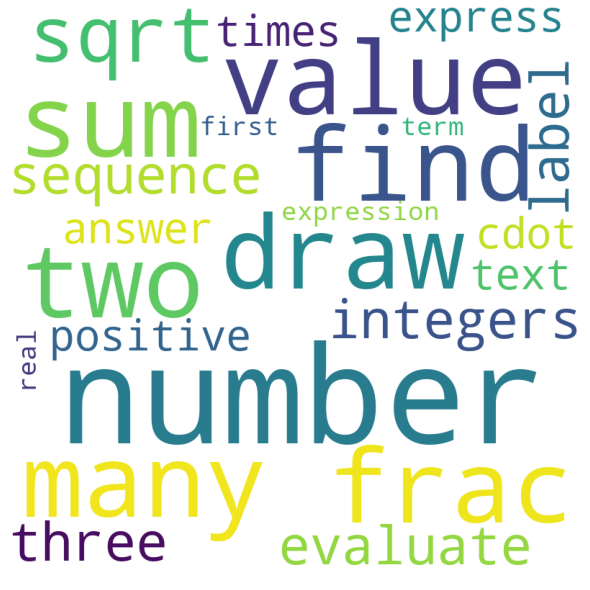

In [64]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(s1)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [70]:
print(medium_words)

['frac', 'value', 'find', 'sqrt', 'sum', 'two', 'express', 'answer', 'real', 'equation', 'line', 'many', 'number', 'label', 'integers', 'text', 'evaluate', 'square', 'fraction', 'values', 'point', 'end', 'common', 'right', 'points']


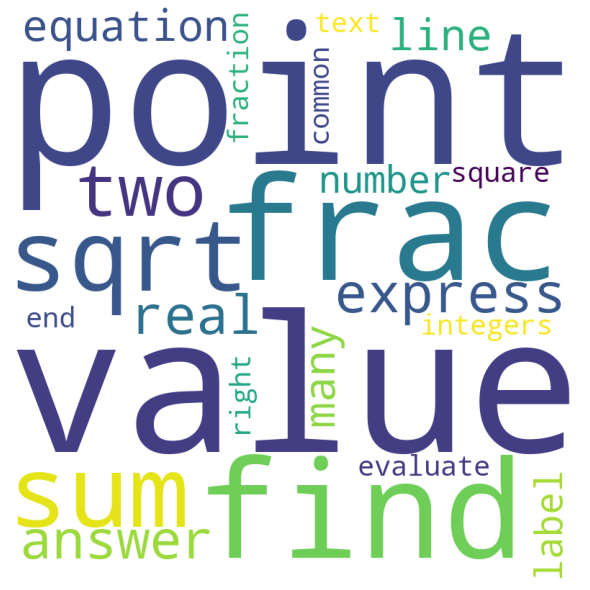

In [65]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(s2)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [71]:
print(hard_words)

['real', 'frac', 'sqrt', 'find', 'value', 'sum', 'graph', 'answer', 'equation', 'positive', 'integers', 'express', 'label', 'draw', 'arrows', 'two', 'many', 'point', 'number', 'abovetrue', 'form', 'numbers', 'integer', 'asy', 'values']


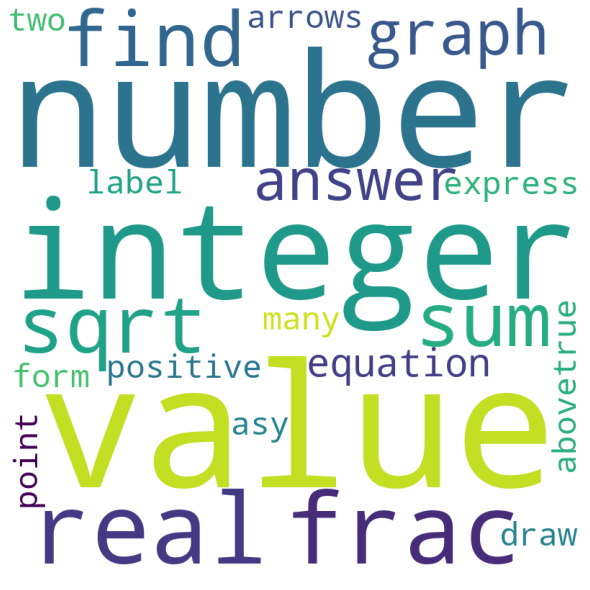

In [66]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(s3)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)